## 라이브러리

In [275]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

plt.rc("font", family = "Malgun Gothic")
plt.rcParams["axes.unicode_minus"] = False

## 데이터 불러오기

사용 데이터는 kaggle의 'Retail-Case-Study-Data'<br>
https://www.kaggle.com/datasets/darpan25bajaj/retail-case-study-data/data

In [276]:
# 데이터 불러오기
customer = pd.read_csv("./data/Customer.csv")
transaction = pd.read_csv("./data/Transactions.csv")
product = pd.read_csv("./data/prod_cat_info.csv")

In [277]:
# 고객 데이터 확인
customer.head()

,customer_Id,DOB,Gender,city_code
0,268408,02-01-1970,M,4.0
1,269696,07-01-1970,F,8.0
2,268159,08-01-1970,F,8.0
3,270181,10-01-1970,F,2.0
4,268073,11-01-1970,M,1.0


고객ID, 생년월일, 성별, 지역코드 4개의 컬럼

In [278]:
# 주문 데이터 확인
transaction.head()

,transaction_id,cust_id,tran_date,prod_subcat_code,prod_cat_code,Qty,Rate,Tax,total_amt,Store_type
0,80712190438,270351,28-02-2014,1,1,-5,-772,405.300,-4265.300,e-Shop
1,29258453508,270384,27-02-2014,5,3,-5,-1497,785.925,-8270.925,e-Shop
2,51750724947,273420,24-02-2014,6,5,-2,-791,166.110,-1748.110,TeleShop
3,93274880719,271509,24-02-2014,11,6,-3,-1363,429.345,-4518.345,e-Shop
4,51750724947,273420,23-02-2014,6,5,-2,-791,166.110,-1748.110,TeleShop


주문ID, 고객ID, 주문날짜, 제품하위카테고리코드, 제품카테고리코드, 수량, 단가, 세금, 총금액, 상점유형 10개의 컬럼

In [279]:
# 상품 데이터 확인
product.head()

,prod_cat_code,prod_cat,prod_sub_cat_code,prod_subcat
0,1,Clothing,4,Mens
1,1,Clothing,1,Women
2,1,Clothing,3,Kids
3,2,Footwear,1,Mens
4,2,Footwear,3,Women


제품카테고리코드, 제품카테고리, 제품하위카테고리코드, 제품하위카테고리 4개의 컬럼

## 데이터 전처리

In [280]:
# 고객 데이터 정보 확인
# - 고객 데이터 5647행
# - 생년월일(DOB) 컬럼 날짜 타입으로 변환하기
# - 성별과 지역 코드에서 2개의 결측치 발견
customer.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5647 entries, 0 to 5646
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   customer_Id  5647 non-null   int64  
 1   DOB          5647 non-null   object 
 2   Gender       5645 non-null   object 
 3   city_code    5645 non-null   float64
dtypes: float64(1), int64(1), object(2)
memory usage: 176.6+ KB


In [281]:
# 결측치 제거
# - 결측치는 제거해도 무방하다고 판단
customer = customer.dropna()

In [282]:
# 결측치 제거 후 확인
customer.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5643 entries, 0 to 5646
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   customer_Id  5643 non-null   int64  
 1   DOB          5643 non-null   object 
 2   Gender       5643 non-null   object 
 3   city_code    5643 non-null   float64
dtypes: float64(1), int64(1), object(2)
memory usage: 220.4+ KB


In [283]:
# 날짜 타입으로 변환
customer["DOB"] = pd.to_datetime(customer["DOB"], format='%d-%m-%Y')
customer.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5643 entries, 0 to 5646
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   customer_Id  5643 non-null   int64         
 1   DOB          5643 non-null   datetime64[ns]
 2   Gender       5643 non-null   object        
 3   city_code    5643 non-null   float64       
dtypes: datetime64[ns](1), float64(1), int64(1), object(1)
memory usage: 220.4+ KB


In [284]:
# 주문 데이터 정보 확인
# - 주문 데이터 23053행
# - tran_data 컬럼 날짜 타입으로 변환하기
# - 결측치는 없음
transaction.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23053 entries, 0 to 23052
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   transaction_id    23053 non-null  int64  
 1   cust_id           23053 non-null  int64  
 2   tran_date         23053 non-null  object 
 3   prod_subcat_code  23053 non-null  int64  
 4   prod_cat_code     23053 non-null  int64  
 5   Qty               23053 non-null  int64  
 6   Rate              23053 non-null  int64  
 7   Tax               23053 non-null  float64
 8   total_amt         23053 non-null  float64
 9   Store_type        23053 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.8+ MB


In [285]:
# 날짜 타입으로 변환
transaction["tran_date"] = pd.to_datetime(transaction['tran_date'], format='mixed')
transaction.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23053 entries, 0 to 23052
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   transaction_id    23053 non-null  int64         
 1   cust_id           23053 non-null  int64         
 2   tran_date         23053 non-null  datetime64[ns]
 3   prod_subcat_code  23053 non-null  int64         
 4   prod_cat_code     23053 non-null  int64         
 5   Qty               23053 non-null  int64         
 6   Rate              23053 non-null  int64         
 7   Tax               23053 non-null  float64       
 8   total_amt         23053 non-null  float64       
 9   Store_type        23053 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(6), object(1)
memory usage: 1.8+ MB


In [286]:
# 상품 데이터 정보 확인
# - 상품 데이터 23행
# - 결측치 없음
product.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23 entries, 0 to 22
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   prod_cat_code      23 non-null     int64 
 1   prod_cat           23 non-null     object
 2   prod_sub_cat_code  23 non-null     int64 
 3   prod_subcat        23 non-null     object
dtypes: int64(2), object(2)
memory usage: 864.0+ bytes


### 고객 데이터 나이 컬럼 추가

생년월일 컬럼을 기반으로 나이 컬럼을 새로 추가하기<br>
2014년 거래 데이터이므로 2014년 기준 나이 생성

In [287]:
customer["age"] = 2014 - customer["DOB"].dt.year
customer.head()

,customer_Id,DOB,Gender,city_code,age
0,268408,1970-01-02,M,4.0,44
1,269696,1970-01-07,F,8.0,44
2,268159,1970-01-08,F,8.0,44
3,270181,1970-01-10,F,2.0,44
4,268073,1970-01-11,M,1.0,44


### 주문 데이터 주문상태 컬럼 추가

주문 수량(Qty)이 0보다 작으면 주문 취소라고 판단하여 'cancel'로, 그 외에는 'order'로 값 주기

In [288]:
# 주문ID count 확인
transaction["transaction_id"].value_counts()

transaction_id
4170892941     4
32263938079    4
426787191      4
91377906980    3
44125492691    3
              ..
88791150012    1
17648795819    1
25673128667    1
14616200775    1
77960931771    1
Name: count, Length: 20878, dtype: int64

한 주문ID에 최대 2개의 데이터가 존재할 수 있는데(주문, 주문취소) 그 이상인 데이터 확인

In [289]:
# 임의로 하나의 주문ID 확인
transaction[transaction["transaction_id"] == 4170892941]

,transaction_id,cust_id,tran_date,prod_subcat_code,prod_cat_code,Qty,Rate,Tax,total_amt,Store_type
16207,4170892941,266852,2011-12-24,8,3,-1,-412,43.26,-455.26,MBR
16267,4170892941,266852,2011-12-21,8,3,-1,-412,43.26,-455.26,MBR
16269,4170892941,266852,2011-12-21,8,3,-1,-412,43.26,-455.26,MBR
16288,4170892941,266852,2011-12-20,8,3,1,412,43.26,455.26,MBR


하나의 주문에 주문 취소가 한 번 이상 발생한 상황<br>
→ 이는 이상치로 판단하고 하나의 주문 취소만 남긴 후 제거하기로 결정

In [290]:
# 한 주문ID에 주문 취소가 여러개면 하나만 남기고 삭제
# - tran_date가 가장 오래된 것만 남기고 삭제
transaction = transaction.sort_values(by=['transaction_id', 'tran_date'], ascending=[True, True]).groupby('transaction_id').head(2)

In [291]:
# 이상치 확인
transaction["transaction_id"].value_counts()

transaction_id
40678283758    2
34239069179    2
80145493464    2
68994648826    2
9914653639     2
              ..
34900478457    1
34892939554    1
34888500103    1
34885826494    1
99987549630    1
Name: count, Length: 20878, dtype: int64

In [292]:
# 주문 상태를 나타내는 "order_status" 컬럼을 생성
transaction["order_status"] = "order"

# Qty가 0보다 작으면 주문이 취소된 것으로 판단하고 상태를 'cancel'로 설정
transaction.loc[transaction["Qty"] < 0, "order_status"] = "cancel"

transaction.head()

,transaction_id,cust_id,tran_date,prod_subcat_code,prod_cat_code,Qty,Rate,Tax,total_amt,Store_type,order_status
19224,3268991,272172,2011-02-08,11,6,3,91,28.665,301.665,e-Shop,order
5884,7073244,269640,2013-11-05,12,5,4,1385,581.700,6121.700,MBR,order
2430,10861359,272671,2013-10-25,4,4,2,103,21.630,227.630,Flagship store,order
21760,15741026,271544,2011-03-28,12,5,1,299,31.395,330.395,e-Shop,order
4239,16165359,273203,2013-01-08,4,1,2,580,121.800,1281.800,e-Shop,order


---

## 데이터 조인하기

### 1. transaction과 product 조인

In [293]:
# 제품하위카테고리명의 컬럼명이 서로 다르기 때문에 변환
product.rename(columns={"prod_sub_cat_code":"prod_subcat_code"}, inplace=True)
product.head()

,prod_cat_code,prod_cat,prod_subcat_code,prod_subcat
0,1,Clothing,4,Mens
1,1,Clothing,1,Women
2,1,Clothing,3,Kids
3,2,Footwear,1,Mens
4,2,Footwear,3,Women


In [294]:
# 주문 테이블과 상품 테이블 조인
trans_prod = pd.merge(left=transaction,
                      right=product,
                      how="left",
                      on=["prod_cat_code", "prod_subcat_code"])
trans_prod.head()

,transaction_id,cust_id,tran_date,prod_subcat_code,prod_cat_code,Qty,Rate,Tax,total_amt,Store_type,order_status,prod_cat,prod_subcat
0,3268991,272172,2011-02-08,11,6,3,91,28.665,301.665,e-Shop,order,Home and kitchen,Bath
1,7073244,269640,2013-11-05,12,5,4,1385,581.700,6121.700,MBR,order,Books,Academic
2,10861359,272671,2013-10-25,4,4,2,103,21.630,227.630,Flagship store,order,Bags,Women
3,15741026,271544,2011-03-28,12,5,1,299,31.395,330.395,e-Shop,order,Books,Academic
4,16165359,273203,2013-01-08,4,1,2,580,121.800,1281.800,e-Shop,order,Clothing,Mens


### 2. trans_prod와 customer 조인

In [295]:
# 고객ID 컬럼명이 다르기 때문에 변환
customer.rename(columns={"customer_Id":"cust_id"}, inplace=True)
customer.head()

,cust_id,DOB,Gender,city_code,age
0,268408,1970-01-02,M,4.0,44
1,269696,1970-01-07,F,8.0,44
2,268159,1970-01-08,F,8.0,44
3,270181,1970-01-10,F,2.0,44
4,268073,1970-01-11,M,1.0,44


In [296]:
# 주문 테이블과 상품 테이블 조인
total = pd.merge(left=trans_prod,
                 right=customer,
                 how="left",
                 on="cust_id")
total.head()

,transaction_id,cust_id,tran_date,prod_subcat_code,prod_cat_code,Qty,Rate,Tax,total_amt,Store_type,order_status,prod_cat,prod_subcat,DOB,Gender,city_code,age
0,3268991,272172,2011-02-08,11,6,3,91,28.665,301.665,e-Shop,order,Home and kitchen,Bath,1975-09-17,M,10.0,39.0
1,7073244,269640,2013-11-05,12,5,4,1385,581.700,6121.700,MBR,order,Books,Academic,1970-04-29,M,7.0,44.0
2,10861359,272671,2013-10-25,4,4,2,103,21.630,227.630,Flagship store,order,Bags,Women,1974-04-01,F,7.0,40.0
3,15741026,271544,2011-03-28,12,5,1,299,31.395,330.395,e-Shop,order,Books,Academic,1986-05-08,F,5.0,28.0
4,16165359,273203,2013-01-08,4,1,2,580,121.800,1281.800,e-Shop,order,Clothing,Mens,1984-02-29,M,2.0,30.0


---

## 탐색적 데이터 분석 EDA

### 1. 지역별 고객 수

In [297]:
city_counts = customer['city_code'].value_counts().reset_index()
city_counts

,city_code,count
0,3.0,595
1,5.0,586
2,4.0,582
3,7.0,575
4,2.0,563
5,8.0,562
6,10.0,558
7,1.0,551
8,9.0,546
9,6.0,525


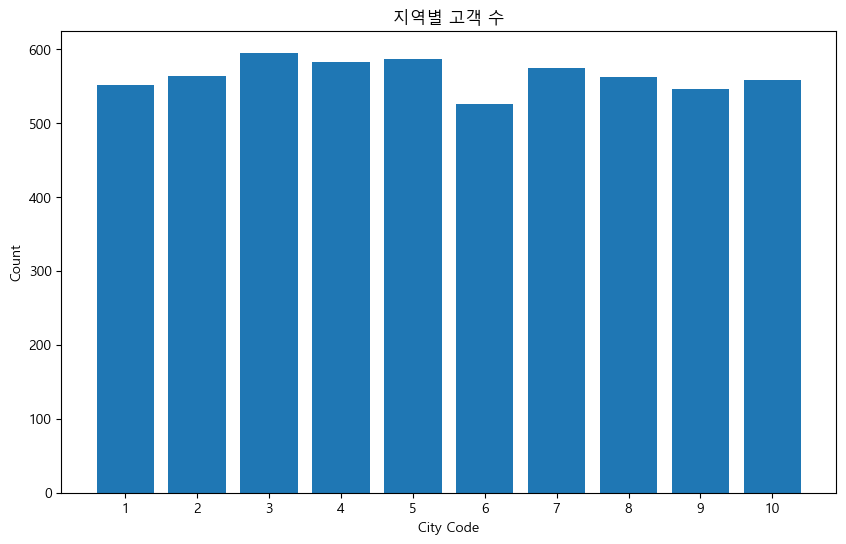

In [298]:
# 1. 지역별 고객 수 시각화
plt.figure(figsize=(10, 6))
plt.bar(city_counts['city_code'], city_counts['count'])
plt.xlabel('City Code')
plt.ylabel('Count')
plt.xticks(range(1,11,1))
plt.title('지역별 고객 수')
plt.savefig('./savefig/지역별_고객_수.png')

가장 많은 고객이 있는 지역은 지역 코드 3이며, 모든 지역에 500명에서 600명 사이의 고객이 있음

### 2. 카테고리별 상품수

In [299]:
prod_cat = product["prod_cat"].value_counts().reset_index()
prod_cat

,prod_cat,count
0,Books,6
1,Electronics,5
2,Home and kitchen,4
3,Clothing,3
4,Footwear,3
5,Bags,2


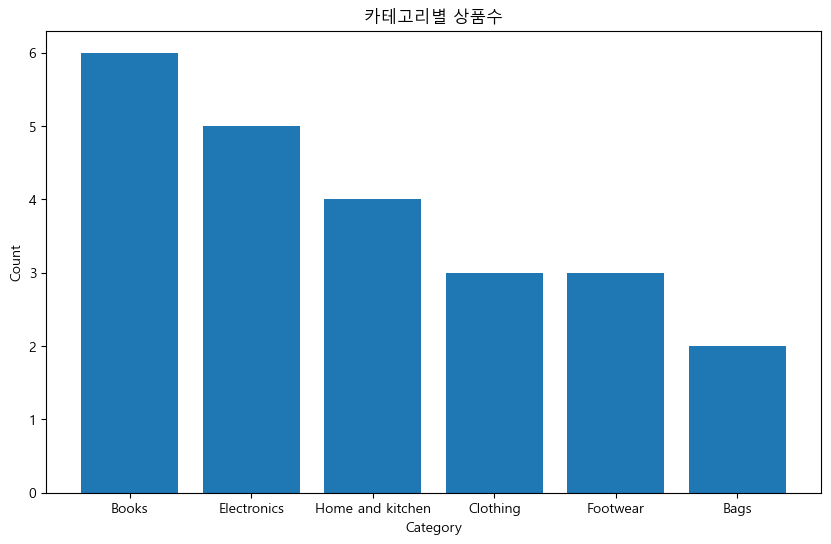

In [300]:
# 2. 카테고리별 상품수
plt.figure(figsize=(10, 6))
plt.bar(prod_cat['prod_cat'], prod_cat['count'])
plt.xlabel('Category')
plt.ylabel('Count')
plt.title('카테고리별 상품수')
plt.savefig('./savefig/카테고리별_상품수.png')

책 카테고리 상품이 6개로 가장 많으며, 가방 카테고리 상품이 2개로 가장 적음

### 3. 일자에 따른 주문 수

3-1. order_status가 order인 것만 시각화

In [318]:
tran_date = total[total['order_status']=='order']['tran_date'].value_counts().reset_index()
# 날짜순으로 정렬
tran_date = tran_date.sort_values(by='tran_date',ignore_index=True)
tran_date

,tran_date,count
0,2011-01-02,23
1,2011-01-03,12
2,2011-01-04,23
3,2011-01-05,22
4,2011-01-06,17
...,...,...
1118,2014-10-02,17
1119,2014-11-01,19
1120,2014-11-02,18
1121,2014-12-01,27


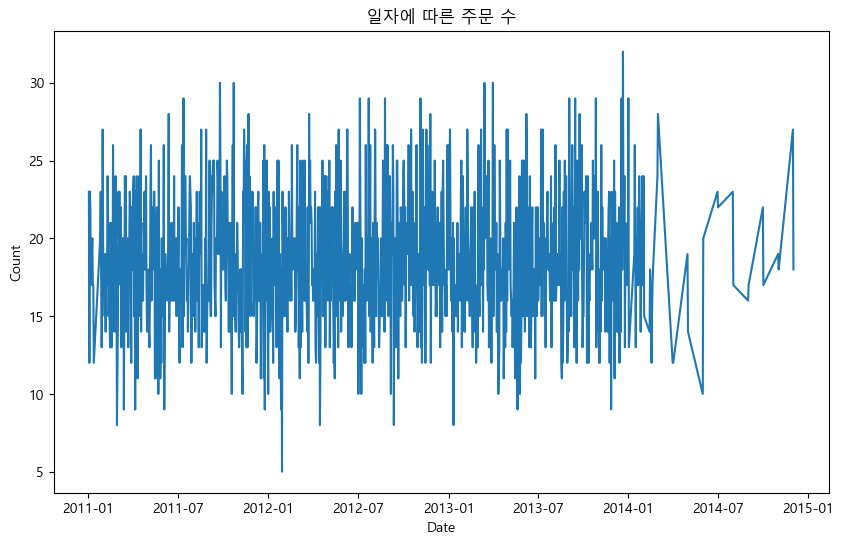

In [320]:
# 3-1. 일자에 따른 주문 수
plt.figure(figsize=(10, 6))
plt.plot(tran_date['tran_date'], tran_date['count'])
plt.xlabel('Date')
plt.ylabel('Count')
plt.title('일자에 따른 주문 수')
plt.savefig('./savefig/일자에_따른_주문_수.png')

3-2. 주문취소가 되지 않은 주문 수

In [324]:
tran_id = total['transaction_id'].value_counts().reset_index()
# count가 2이면 삭제(주문, 주문취소)
order_id = tran_id[tran_id['count'] != 2]
order_id

,transaction_id,count
2057,65461137226,1
2058,67374891777,1
2059,65487816142,1
2060,65473648661,1
2061,72584124562,1
...,...,...
20873,34900478457,1
20874,34892939554,1
20875,34888500103,1
20876,34885826494,1


In [330]:
order_df = total[total['transaction_id'].isin(order_id['transaction_id'])]
order_df

,transaction_id,cust_id,tran_date,prod_subcat_code,prod_cat_code,Qty,Rate,Tax,total_amt,Store_type,order_status,prod_cat,prod_subcat,DOB,Gender,city_code,age
0,3268991,272172,2011-02-08,11,6,3,91,28.665,301.665,e-Shop,order,Home and kitchen,Bath,1975-09-17,M,10.0,39.0
1,7073244,269640,2013-11-05,12,5,4,1385,581.700,6121.700,MBR,order,Books,Academic,1970-04-29,M,7.0,44.0
2,10861359,272671,2013-10-25,4,4,2,103,21.630,227.630,Flagship store,order,Bags,Women,1974-04-01,F,7.0,40.0
3,15741026,271544,2011-03-28,12,5,1,299,31.395,330.395,e-Shop,order,Books,Academic,1986-05-08,F,5.0,28.0
4,16165359,273203,2013-01-08,4,1,2,580,121.800,1281.800,e-Shop,order,Clothing,Mens,1984-02-29,M,2.0,30.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22926,99957916781,274187,2013-09-20,4,4,2,202,42.420,446.420,TeleShop,order,Bags,Women,1984-05-23,M,10.0,30.0
22927,99959918143,269373,2012-11-19,6,5,3,279,87.885,924.885,MBR,order,Books,DIY,1983-07-08,F,3.0,31.0
22930,99967775192,266852,2012-01-20,2,6,2,539,113.190,1191.190,Flagship store,order,Home and kitchen,Furnishing,1990-01-15,M,5.0,24.0
22931,99985121471,271104,2013-04-02,4,3,3,220,69.300,729.300,Flagship store,order,Electronics,Mobiles,1983-08-07,F,7.0,31.0


In [333]:
# 목록에 하나만 있는데 취소인 주문도 존재함 (2건)
# - 삭제 처리
order_df = order_df[order_df['order_status']!='cancel']

In [389]:
tran_date_order = order_df['tran_date'].value_counts().reset_index()
# 날짜순으로 정렬
tran_date_order = tran_date_order.sort_values(by='tran_date',ignore_index=True)
tran_date_order

,tran_date,count
0,2011-01-02,19
1,2011-01-03,10
2,2011-01-04,21
3,2011-01-05,21
4,2011-01-06,16
...,...,...
1118,2014-10-02,17
1119,2014-11-01,17
1120,2014-11-02,17
1121,2014-12-01,24


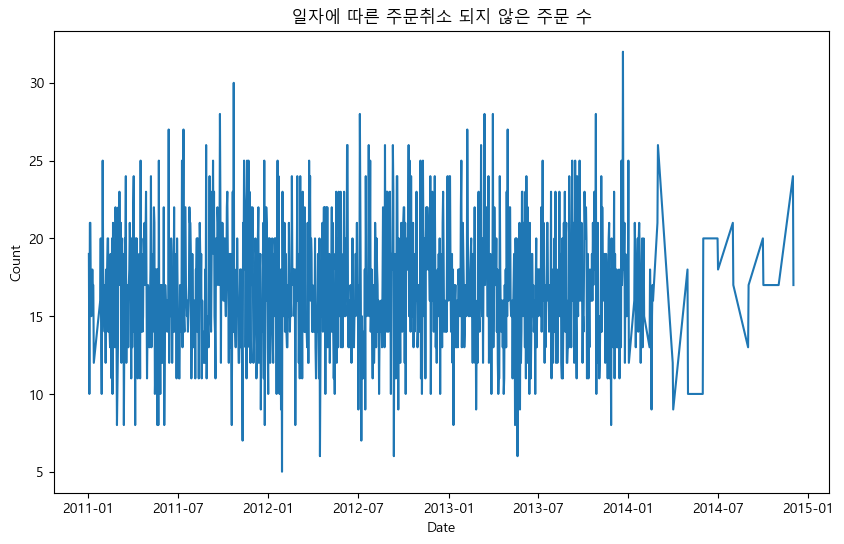

In [336]:
# 3-2. 일자에 따른 주문취소 되지 않은 주문수
plt.figure(figsize=(10, 6))
plt.plot(tran_date_order['tran_date'], tran_date_order['count'])
plt.xlabel('Date')
plt.ylabel('Count')
plt.title('일자에 따른 주문취소 되지 않은 주문 수')
plt.savefig('./savefig/일자에_따른_주문취소_되지않은_주문_수.png')

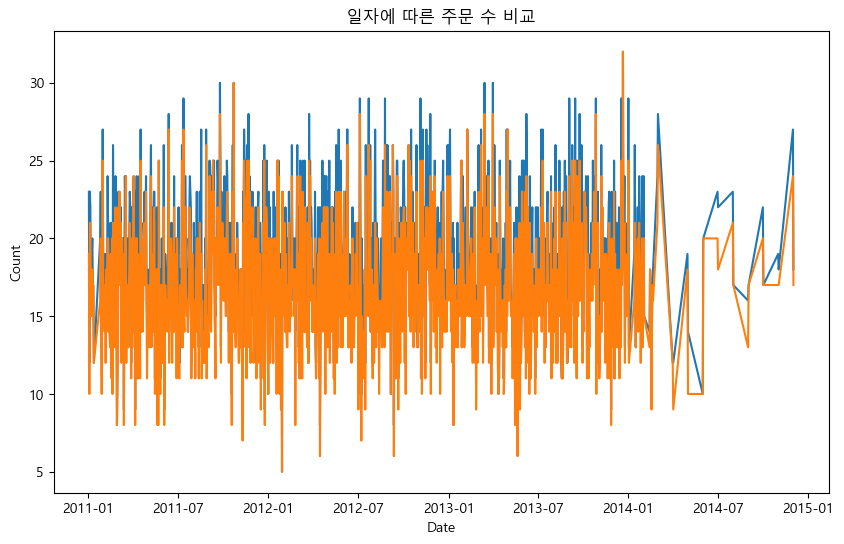

In [341]:
# 3-3. 일자에 따른 주문취소 되지 않은 주문수
plt.figure(figsize=(10, 6))
plt.plot(tran_date['tran_date'], tran_date['count'])
plt.plot(tran_date_order['tran_date'], tran_date_order['count'])
plt.xlabel('Date')
plt.ylabel('Count')
plt.title('일자에 따른 주문 수 비교')
plt.savefig('./savefig/일자에_따른_주문_수_비교.png')

전체 주문건수와 주문취소를 제외한 주문건수는 비슷한 패턴을 보임. 2014년 2월부터 주문이 불규칙하게 발생함.<br>
데이터의 기간은 2011년 1월 2일부터 2014년 12월 2일까지의 기간을 포함하고 있음.

### 4. 일자에 따른 결제금액

In [390]:
# 결제금액의 합을 구함
total_amt_sum = order_df.groupby('tran_date')['total_amt'].sum().reset_index()

# 날짜순으로 정렬
total_amt_sum = total_amt_sum.sort_values(by='tran_date', ignore_index=True)

# 결과 출력
total_amt_sum

,tran_date,total_amt
0,2011-01-02,52144.950
1,2011-01-03,27595.165
2,2011-01-04,65225.940
3,2011-01-05,60108.685
4,2011-01-06,38657.320
...,...,...
1118,2014-10-02,39342.420
1119,2014-11-01,53664.325
1120,2014-11-02,59885.475
1121,2014-12-01,50302.915


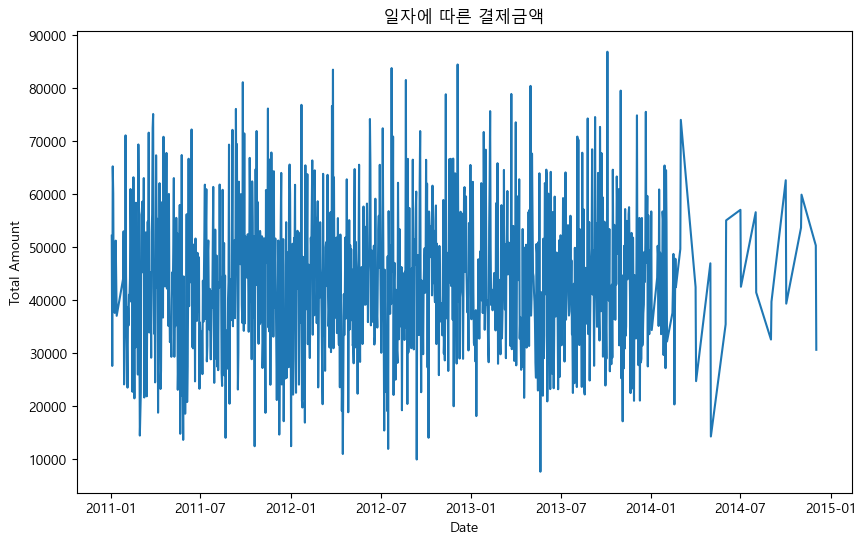

In [391]:
# 4. 일자에 따른 결제금액
plt.figure(figsize=(10, 6))
plt.plot(total_amt_sum['tran_date'], total_amt_sum['total_amt'])
plt.xlabel('Date')
plt.ylabel('Total Amount')
plt.title('일자에 따른 결제금액')
plt.savefig('./savefig/일자에_따른_결제금액.png')

일자에 따른 주문건수 시각화와 비슷한 패턴을 보임

### 5. 지역별 주문 수

In [392]:
city_code = order_df['city_code'].value_counts().reset_index()
# 지역코드 순으로 정렬
city_code = city_code.sort_values(by='city_code',ignore_index=True)
city_code

,city_code,count
0,1.0,1886
1,2.0,1827
2,3.0,1992
3,4.0,1975
4,5.0,1931
5,6.0,1738
6,7.0,1913
7,8.0,1871
8,9.0,1790
9,10.0,1881


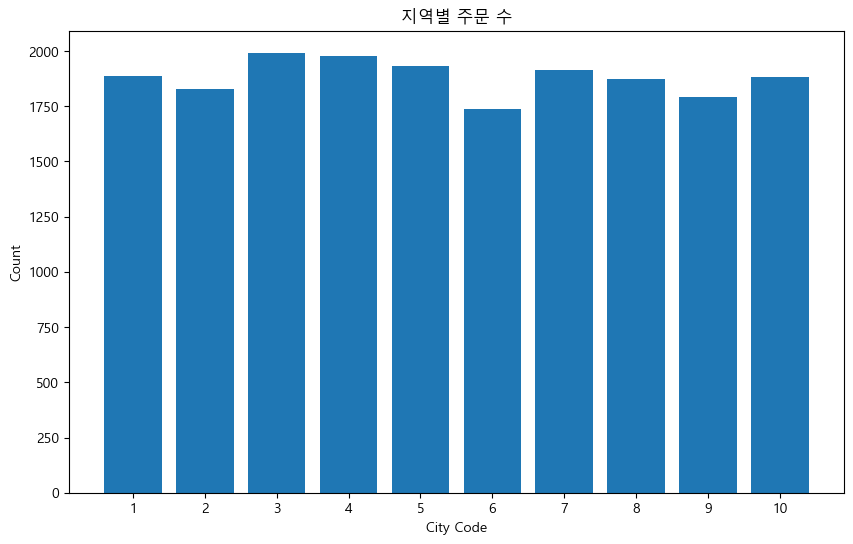

In [393]:
# 5. 지역별 주문 수
plt.figure(figsize=(10, 6))
plt.bar(city_code['city_code'], city_code['count'])
plt.xlabel('City Code')
plt.ylabel('Count')
plt.xticks(range(1,11,1))
plt.title('지역별 주문 수')
plt.savefig('./savefig/지역별_주문_수.png')

지역별 고객 수 시각화와 유사한 패턴이 나타남.<br>
지역 코드 3에 해당하는 지역의 주문 건수가 가장 많으며, 동시에 해당 지역의 고객 수도 가장 많음.<br>
반면에, 지역 코드 6은 고객 수와 주문 건수가 가장 적음.

### 6. 지역별 결제금액

In [394]:
# 결제금액의 합을 구함
total_amt_city = order_df.groupby('city_code')['total_amt'].sum().reset_index()

# 지역코드 순으로 정렬
total_amt_city = total_amt_city.sort_values(by='city_code', ignore_index=True)

# 결과 출력
total_amt_city

,city_code,total_amt
0,1.0,4821861.980
1,2.0,4861493.910
2,3.0,5192428.150
3,4.0,5132245.430
4,5.0,4960762.690
5,6.0,4389494.265
6,7.0,4970738.630
7,8.0,4897526.855
8,9.0,4748634.735
9,10.0,4892636.125


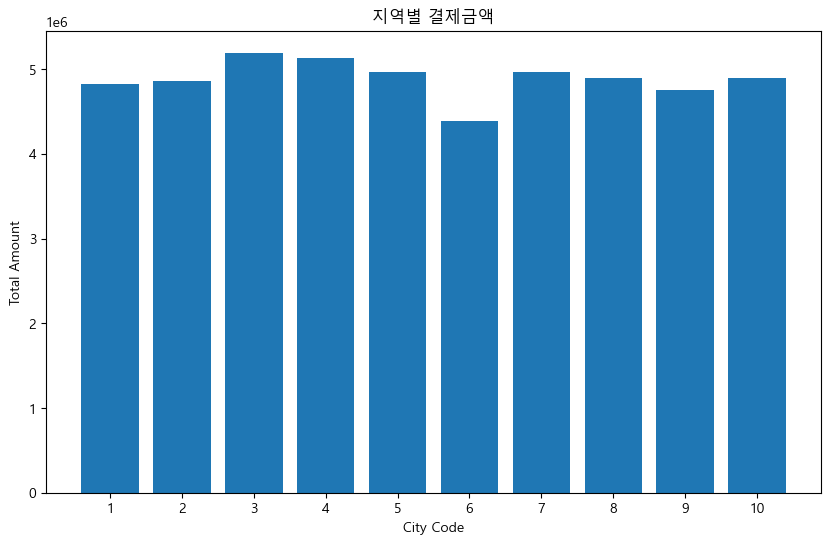

In [395]:
# 6. 지역별 결제금액
plt.figure(figsize=(10, 6))
plt.bar(total_amt_city['city_code'], total_amt_city['total_amt'])
plt.xlabel('City Code')
plt.ylabel('Total Amount')
plt.xticks(range(1,11,1))
plt.title('지역별 결제금액')
plt.savefig('./savefig/지역별_결제금액.png')

마찬가지로 지역별 고객 수, 지역별 주문건수 시각화와 비슷한 패턴을 보임<br>
지역 코드 3에 해당하는 지역의 총 결제금액이 가장 크고, 반면에 지역 코드 6은 총 결제금액이 가장 작음

### 7. 성별에 따른 카테고리 주문 수

In [365]:
# 성별 카운트
customer['Gender'].value_counts()

Gender
M    2891
F    2752
Name: count, dtype: int64

고객 중 남성이 더 많음

In [396]:
male_order = order_df[order_df['Gender'] == 'M']['prod_cat'].value_counts().reset_index()
male_order

,prod_cat,count
0,Books,2548
1,Electronics,2144
2,Home and kitchen,1721
3,Clothing,1264
4,Footwear,1194
5,Bags,797


In [397]:
female_order = order_df[order_df['Gender'] == 'F']['prod_cat'].value_counts().reset_index()
female_order

,prod_cat,count
0,Books,2380
1,Electronics,1945
2,Home and kitchen,1634
3,Footwear,1241
4,Clothing,1141
5,Bags,795


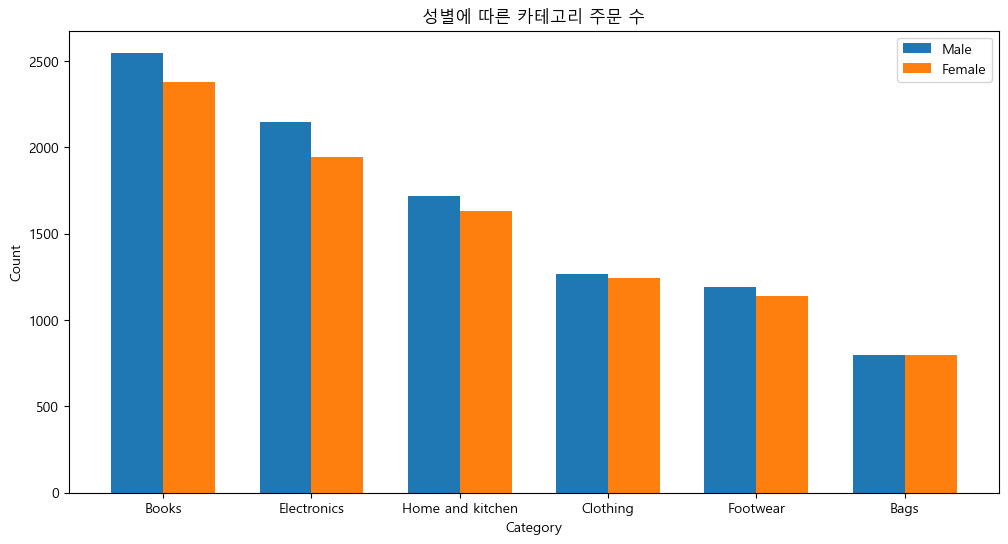

In [398]:
# 7. 성별에 따른 카테고리 주문 수
bar_width = 0.35
index = np.arange(len(male_order['prod_cat']))

plt.figure(figsize=(12, 6))

plt.bar(index, male_order['count'], width=bar_width, label='Male')
plt.bar(index + bar_width, female_order['count'], width=bar_width, label='Female')

plt.xlabel('Category')
plt.ylabel('Count')
plt.title('성별에 따른 카테고리 주문 수')
plt.xticks(index + bar_width / 2, male_order['prod_cat'])
plt.legend()
plt.savefig('./savefig/성별에_따른_카테고리_주문수.png')

전체 고객 중에서 남성이 더 많으며, 모든 카테고리에서도 남성 고객이 여성 고객보다 주문 건수가 많은 것을 확인함<br>
또한, 카테고리 구매 순위는 남성과 여성 모두 동일하게 나타남<br>
Books, Electronics 카테고리 물건에 대한 광고를 하면 효과가 좋을 것으로 예상

### 8. 연령대에 따른 카테고리 주문 수

In [399]:
age_order = order_df['age'].value_counts().reset_index()
# 나이 순으로 정렬
age_order = age_order.sort_values(by='age', ignore_index=True)
age_order

,age,count
0,22.0,863
1,23.0,720
2,24.0,749
3,25.0,935
4,26.0,833
5,27.0,943
6,28.0,773
7,29.0,837
8,30.0,776
9,31.0,740


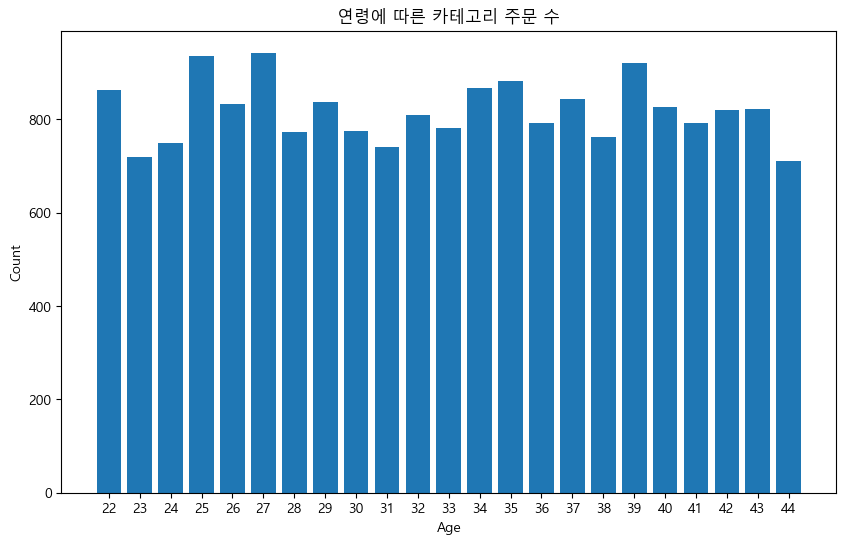

In [400]:
# 8. 연령에 따른 카테고리 주문 수
plt.figure(figsize=(10, 6))
plt.bar(age_order['age'], age_order['count'])
plt.xlabel('Age')
plt.ylabel('Count')
plt.xticks(range(22,45,1))
plt.title('연령에 따른 카테고리 주문 수')
plt.savefig('./savefig/연령에_따른_카테고리_주문수.png')

구매자들의 나이를 바탕으로 시각화한 결과, 어떤 연령대 그룹에서 구매가 가장 활발하게 일어나는지 명확하게 파악하기 어려움





In [401]:
# 나이를 기준으로 20대, 30대, 40대로 묶기
bins = [20, 29, 39, 49]
labels = ['20대', '30대', '40대']
age_order['age_group'] = pd.cut(age_order['age'], bins=bins, labels=labels, right=False)

# 나이 그룹에 따른 합계 계산
age_sum = age_order.groupby('age_group', observed=False)['count'].sum().reset_index()

# 결과 출력
age_sum

,age_group,count
0,20대,5816
1,30대,8092
2,40대,4896


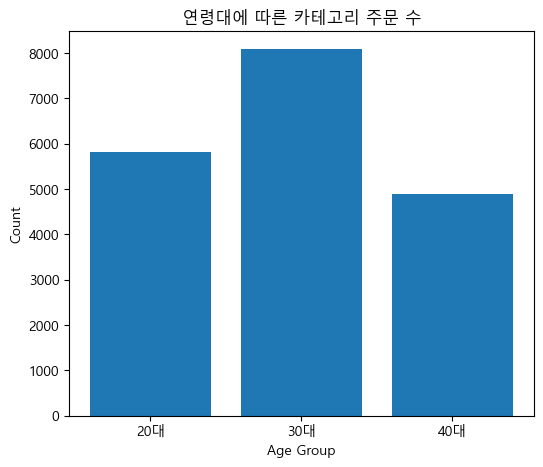

In [402]:
# 8-1. 연령대에 따른 카테고리 주문 수
plt.figure(figsize=(6, 5))
plt.bar(age_sum['age_group'], age_sum['count'])
plt.xlabel('Age Group')
plt.ylabel('Count')
plt.title('연령대에 따른 카테고리 주문 수')
plt.savefig('./savefig/연령대에_따른_카테고리_주문수.png')

주문이 가장 많은 연령대가 30대로 나타났지만, 이는 30-39세의 고객 데이터를 기반으로 한 결과임<br>
한편, 20대는 22-29세의 고객, 40대는 40-44세까지의 고객 데이터로 이루어져 있어서 각 연령대별 고객 수의 영향을 받은 결과로 해석됨

### 9. 가게 타입별 주문 수

In [403]:
store_order = order_df['Store_type'].value_counts().reset_index()
store_order

,Store_type,count
0,e-Shop,7595
1,MBR,3780
2,Flagship store,3738
3,TeleShop,3706


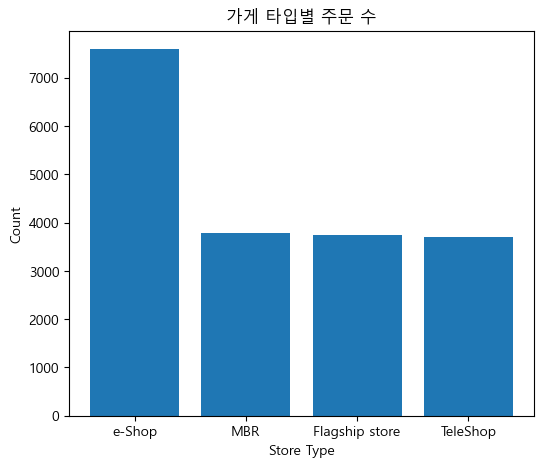

In [404]:
# 9. 가게 타입별 주문 수
plt.figure(figsize=(6, 5))
plt.bar(store_order['Store_type'], store_order['count'])
plt.xlabel('Store Type')
plt.ylabel('Count')
plt.title('가게 타입별 주문 수')
plt.savefig('./savefig/가게_타입별_주문수.png')

e-Shop이 다른 Store와 비교했을 때 두 배 이상의 주문 수를 보임<br>
e-Shop에 대한 집중적인 마케팅 전략 수립이 필요하다고 판단됨

타깃 시장의 세분화를 통해 특정 고객층을 명확히 정의하고, 고객에게 더 맞춤화된 콘텐츠와 광고를 제공함으로써 마케팅 효과를 극대화할 필요가 있음<br><br>
데이터 분석을 기반으로 한 타깃팅 전략을 도입하여 사용자들에게 보다 맞춤화된 광고 및 프로모션을 제공함으로써 고객 유치를 높일 수 있을 것임

---

## 코호트 분석

- 2011-01 ~ 2014-12 의 구매내역 데이터
- 가장 최근인 2014년도는 주문량이 불안정하게 변동됨
- 2014년도에 어떤 문제가 있었는지, 또는 이상치 데이터인지 확인이 되지 않음
- 따라서 2013년 데이터의 각 고객 첫구매 월을 기준으로 코호트 분석함

In [420]:
# 2013년 데이터만 가져오기
cohort = order_df[order_df['tran_date'].dt.year == 2013].copy()

# tran_date에서 월만 추출하기
cohort['month'] = cohort['tran_date'].dt.month

# 첫 구매일의 월별 코호트 생성
cohort['cohort'] = cohort.groupby('cust_id')['month'].transform('min')

# 첫 구매일 월부터 경과 월수 계산
cohort['since'] = cohort['month'] - cohort['cohort']

# 각 코호트 경과 월수에 해당하는 고객 수 계산
cohort_data = cohort.groupby(['cohort', 'since'])['cust_id'].nunique().reset_index()

# 각 코호트의 고객 수 계산
cohort_sizes = cohort.groupby('cohort')['cust_id'].nunique()

# 경과월수별 구매 유지율 계산
cohort_data = cohort_data.merge(cohort_sizes, on='cohort')
cohort_data['retention'] = cohort_data['cust_id_x'] / cohort_data['cust_id_y']
cohort_data

,cohort,since,cust_id_x,cust_id_y,retention
0,1,0,498,498,1.000000
1,1,1,37,498,0.074297
2,1,2,40,498,0.080321
3,1,3,45,498,0.090361
4,1,4,38,498,0.076305
...,...,...,...,...,...
73,10,1,14,244,0.057377
74,10,2,18,244,0.073770
75,11,0,185,185,1.000000
76,11,1,16,185,0.086486


### 구매 유지율 히트맵

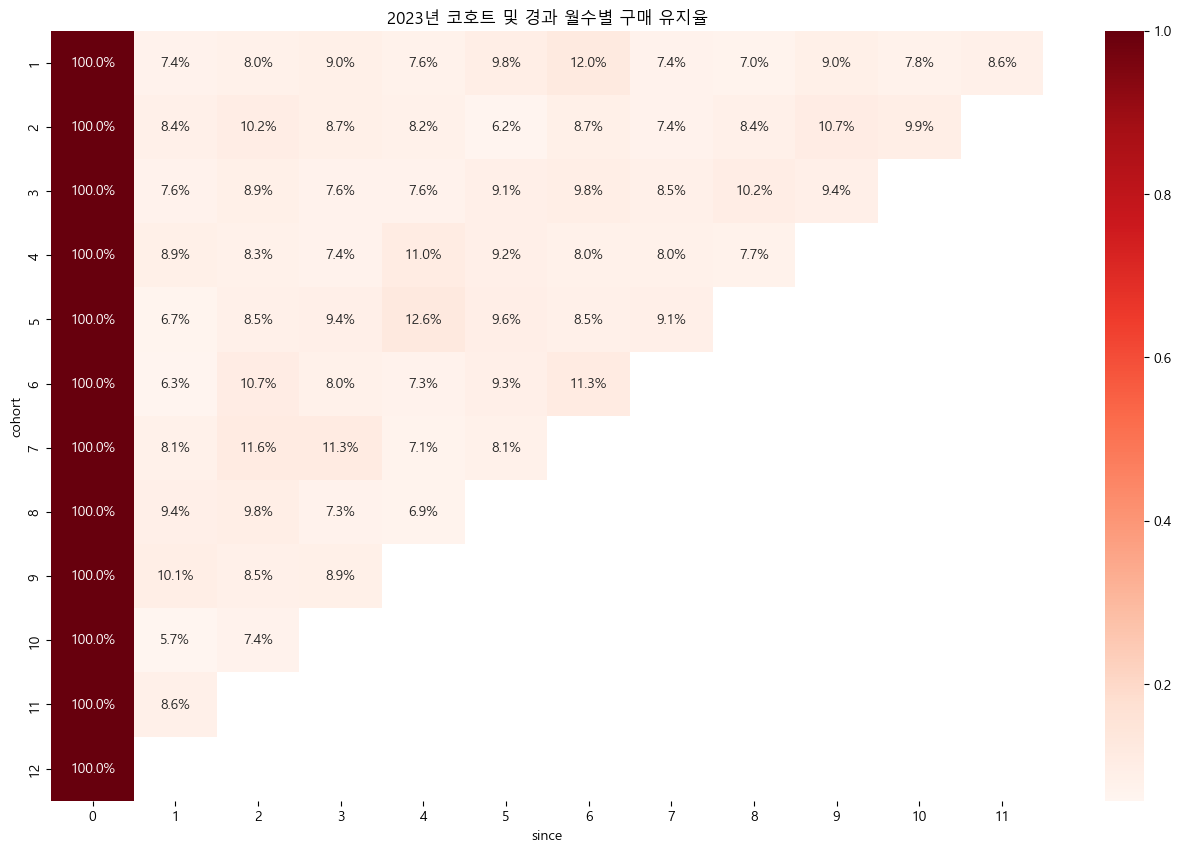

In [439]:
# 코호트와 경과 월수별 구매 유지율 시각화
cohort_heatmap = cohort_data.pivot_table(index='cohort', columns='since', values='retention')

plt.figure(figsize=(16, 10))
plt.title('2023년 코호트 및 경과 월수별 구매 유지율')
sns.heatmap(cohort_heatmap, cmap='Reds', annot=True, fmt='.1%')
plt.savefig('./savefig/코호트_및_경과_월수별_구매_유지율.png')

- 첫 구매 후 한 달이 지난 경우 (M+1) : 평균 재구매율은 8.0%로 나타남
- 첫 구매 후 6개월이 지난 경우 (M+6) : 평균 재구매율은 9.7%로 증가함

이 결과는 시간이 흐름에 따라 고객의 재구매 패턴이 변화함을 의미함<br>
초기에는 재구매율이 낮았으나 시간이 지나면서 고객이 더 많이 재구매하는 경향을 보임<br>
제품 또는 서비스에 대한 고객 만족도가 시간이 지나면서 높아지거나, 마케팅 전략의 효과로 볼 수 있음<br><br>

→ 따라서, 이러한 경향을 분석하여 장기적 마케팅 전략을 세우면 도움이 될 수 있음

### M+1 구매 유지율

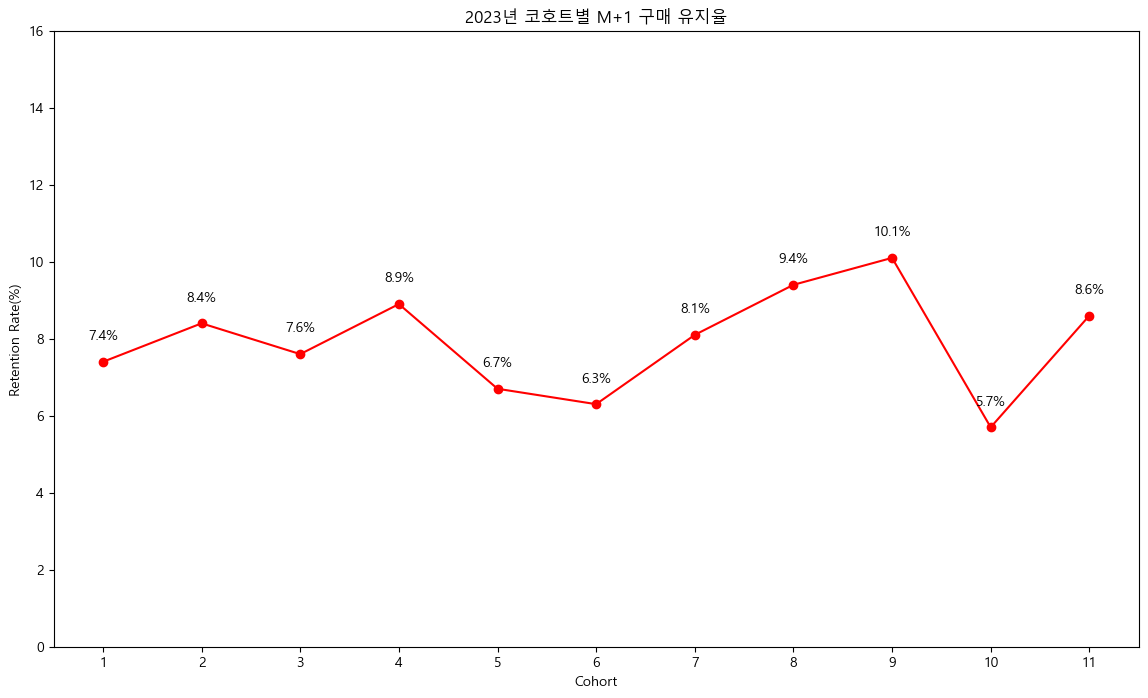

In [446]:
# 각 코호트의 M+1 구매 유지율 현황 계산
M1_cohort = cohort_heatmap[1][:-1].apply(lambda x: round(x*100, 1))

# 그래프 시각화
plt.figure(figsize=(14, 8))
M1_cohort.plot(kind='line', color='red', marker='o')

# 각 데이터 포인트에 값을 표시
for i, val in enumerate(M1_cohort.values):
    plt.text(M1_cohort.index[i], val+0.5, str(val)+'%', ha='center', va='bottom')

# 그래프 설정
plt.title('2023년 코호트별 M+1 구매 유지율')
plt.ylabel('Retention Rate(%)')
plt.xlabel('Cohort')
plt.ylim(0, 16)
plt.xticks(np.arange(1, 12, 1))
plt.savefig('./savefig/코호트별_M+1_구매_유지율.png')

- 9월에 10.1%의 연중 최고치 기록
- 바로 다음 달인 10월에 5.7%의 연중 최저치 기록
- 11월에 다시 8.6%로 어느 정도 회복했으나 원인 파악 필요

M+1 구매 유지율이 평균 8.0%를 기록했지만, 위와 같이 최고치를 찍었다가 급격하게 최저치를 찍는 원인을 파악하는 것이 가장 중요해보임
구매 유지율의 급격한 변동이 발생한 원인을 조사하고, 이러한 상황이 재발하지 않도록 예방하는 것이 중요함

1. 원인 분석
- 세부적인 데이터를 분석하여 구매 유지율의 급격한 변동 원인 파악
- 어떤 제품, 서비스, 또는 기간에 이러한 변동이 발생했는지 확인

2. 마케팅 전략 재평가
- 마케팅 전략이나 캠페인이 변동에 어떤 영향을 미쳤는지 확인하고 재평가
- 효과가 좋지 않은 전략을 수정하고 전략을 다시 수립

3. 고객과의 커뮤니케이션
- 고객과의 소통을 강화하여 제품 또는 서비스의 변화에 대한 정보 수집
- 소비자들이 이해하고 받아들일 수 있는 효과적인 커뮤니케이션 전략을 구축

4. 데이터 모니터링 및 조기 경보 시스템 구축
- 구매 유지율과 관련된 데이터를 실시간으로 모니터링하고 이상 징후를 조기에 감지
- 조기 경보 시스템을 통해 문제가 발생할 때 빠르게 대응

---

## 퍼널 분석

- 2013년도 전체 구매 고객과 주문 취소를 하지 않은 구매 고객 퍼널 차트
- 고객이 구매 후 취소를 하지 않고 구매확정까지 잘 도달하는지 확인

### 구매 - 구매확정 퍼널

In [527]:
# 2013년 데이터만 가져오기
funnel_total = total[total['tran_date'].dt.year == 2013].copy()
funnel_order = order_df[order_df['tran_date'].dt.year == 2013].copy()

# 2013년 전체 구매 고객수
funnel_one = len(pd.pivot_table(funnel_total,
                                index=["cust_id"],
                                values=["transaction_id"],
                                aggfunc=["count"]))

# 주문 취소를 하지 않은 구매 고객수
funnel_two = len(pd.pivot_table(funnel_order,
                                index=["cust_id"],
                                values=["transaction_id"],
                                aggfunc=["count"]))

# 첫번째 퍼널 전환율
funnel_one_ratio = round((funnel_one / len(customer))*100, 1)

# 두번째 퍼널 전환율
funnel_two_ratio = round((funnel_two / funnel_one)*100, 1)

In [528]:
# 가입자 수, 전체 구매 고객수, 주문취소를 하지 않은 고객수에 대한 데이터
data = [
    [len(customer), 0],
    [funnel_one, funnel_one_ratio],
    [funnel_two, funnel_two_ratio]
]

# 데이터프레임 생성
index = ['전체 가입자', '2013 전체 구매 고객수', '2013 주문취소를 하지 않은 고객수']
columns = ['고객수', '전환율(%)']
funnel_df = pd.DataFrame(data, index=index, columns=columns)

# '비대상' 열 추가 및 계산
# - 이전 단계의 고객수에서 현재 단계의 고객수를 뺀 값으로, 각 단계에서 전환된 고객 수를 의미
funnel_df['비대상'] = funnel_df['고객수'].shift(1) - funnel_df['고객수']
funnel_df['비대상'] = funnel_df['비대상'].fillna(0)

# 결과 출력
funnel_df

,고객수,전환율(%),비대상
전체 가입자,5643,0.0,0.0
2013 전체 구매 고객수,3952,70.0,1691.0
2013 주문취소를 하지 않은 고객수,3747,94.8,205.0


### 구매 - 구매확정 퍼널 차트 시각화

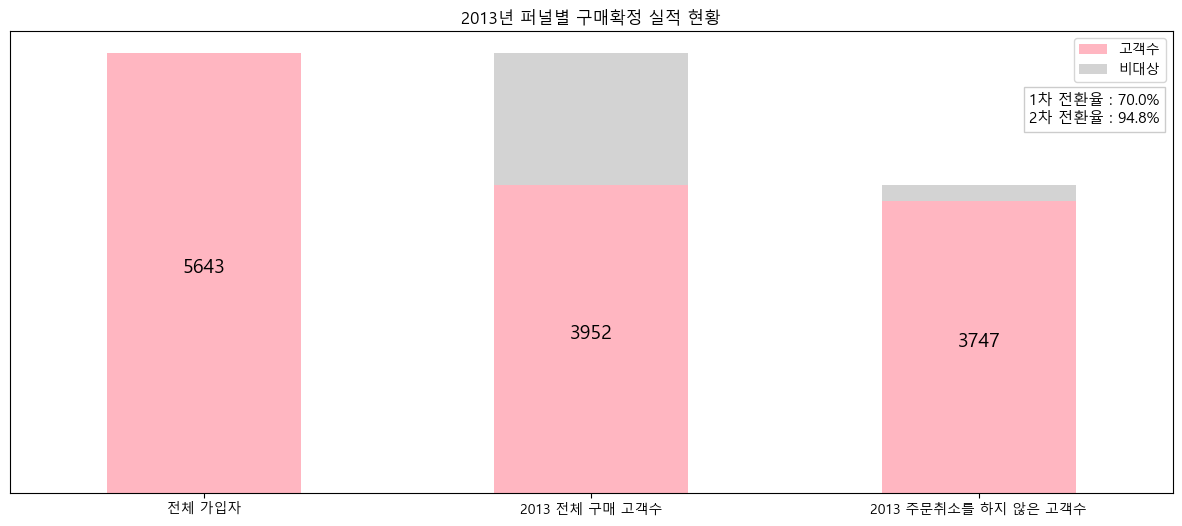

In [529]:
fig, ax = plt.subplots(figsize=(15, 6))

# 데이터프레임에서 '고객수'와 '비대상' 열을 이용하여 계열차트 그리기
funnel_df[["고객수", "비대상"]].plot(kind='bar', stacked=True, ax=ax, color=['#FFB6C1', 'lightgray'])

# x축 레이블 설정
ax.set_xticklabels(funnel_df.index, rotation=0)

# 그래프 제목 설정
ax.set_title("2013년 퍼널별 구매확정 실적 현황")

# y축 레이블 제거
ax.set_yticks([])

# 각 막대에 고객수 표시
for i, val in enumerate(funnel_df['고객수']):
    ax.annotate(str(val), xy=(i, val/2), ha='center', fontsize=14)

# 전환율 텍스트 추가
conversion_rate = f"1차 전환율 : {funnel_df['전환율(%)'].iloc[1]}%\n2차 전환율 : {funnel_df['전환율(%)'].iloc[2]}%"
plt.text(2.13, 4700, conversion_rate, ha='left', va='bottom', fontsize=11, bbox=dict(facecolor='white', alpha=0.2))

plt.savefig('./savefig/퍼널별_구매확정_실적_현황.png')

1. 첫 번째 퍼널 (전체 가입자 -> 2013 전체 구매 고객수)
- 전체 가입자 중 70.0%에 해당하는 3,952명이 구매로 전환됨

2. 두 번째 퍼널 (2013 전체 구매 고객수 -> 2013 주문취소를 하지 않은 고객수)
- 첫 번째 퍼널의 94.8%에 해당하는 3,747명이 주문취소를 하지 않고 구매확정으로 전환됨<br>
- 상당수의 고객이 주문취소를 하지 않고 구매확정으로 넘어갔지만, 5.2%의 고객이 주문 취소로 이탈한 것으로 나타남


두 번째 퍼널에서 주문 취소로 이탈하는 고객이 일부 존재함<br>
고객 이탈을 최소화하고 구매확정으로의 전환을 유도하는 전략이 필요해 보임<br>
고객 경험을 개선하거나 특정 이벤트를 제공하여 이탈을 최소화하는 방식 필요

### 구매 - 재구매 퍼널

In [530]:
# 2013년 전체 구매 고객수
funnel_one = len(pd.pivot_table(funnel_order,
                                index=["cust_id"],
                                values=["transaction_id"],
                                aggfunc=["count"]))

# 재구매한 고객 수
order_count = funnel_order['cust_id'].value_counts().reset_index()
funnel_two = len(order_count[order_count['count'] > 1])

# 첫번째 퍼널 전환율
funnel_one_ratio = round((funnel_one / len(customer))*100, 1)

# 두번째 퍼널 전환율
funnel_two_ratio = round((funnel_two / funnel_one)*100, 1)

In [531]:
# 가입자 수, 전체 구매 고객수, 주문취소를 하지 않은 고객수에 대한 데이터
data = [
    [len(customer), 0],
    [funnel_one, funnel_one_ratio],
    [funnel_two, funnel_two_ratio]
]

# 데이터프레임 생성
index = ['전체 가입자', '2013 구매확정 고객수', '2013 재구매 고객 수']
columns = ['고객수', '전환율(%)']
funnel_df = pd.DataFrame(data, index=index, columns=columns)

# '비대상' 열 추가 및 계산
# - 이전 단계의 고객수에서 현재 단계의 고객수를 뺀 값으로, 각 단계에서 전환된 고객 수를 의미
funnel_df['비대상'] = funnel_df['고객수'].shift(1) - funnel_df['고객수']
funnel_df['비대상'] = funnel_df['비대상'].fillna(0)

# 결과 출력
funnel_df

,고객수,전환율(%),비대상
전체 가입자,5643,0.0,0.0
2013 구매확정 고객수,3747,66.4,1896.0
2013 재구매 고객 수,1684,44.9,2063.0


### 구매 - 재구매 퍼널 시각화

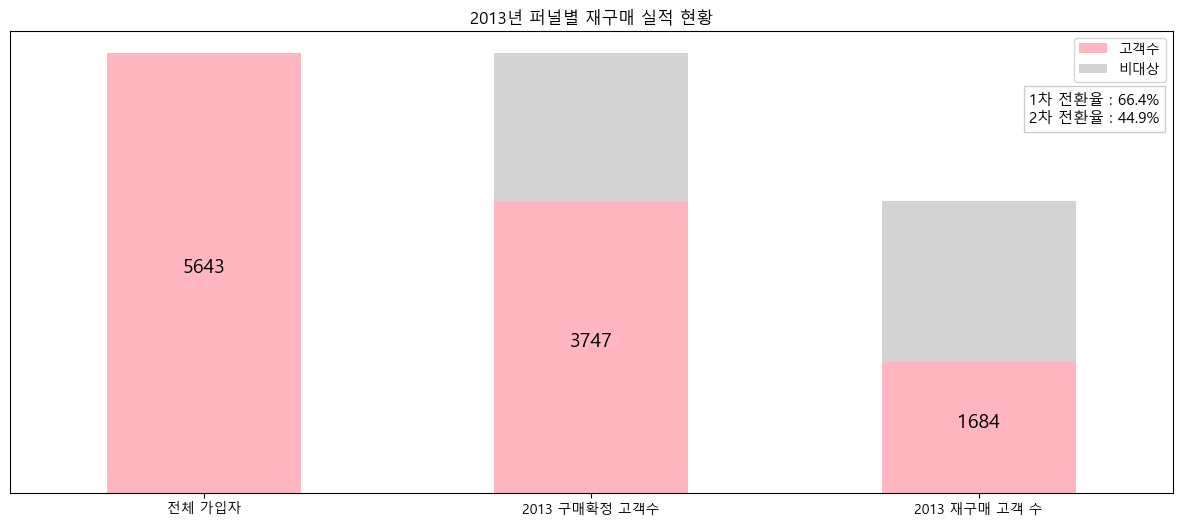

In [532]:
fig, ax = plt.subplots(figsize=(15, 6))

# 데이터프레임에서 '고객수'와 '비대상' 열을 이용하여 계열차트 그리기
funnel_df[["고객수", "비대상"]].plot(kind='bar', stacked=True, ax=ax, color=['#FFB6C1', 'lightgray'])

# x축 레이블 설정
ax.set_xticklabels(funnel_df.index, rotation=0)

# 그래프 제목 설정
ax.set_title("2013년 퍼널별 재구매 실적 현황")

# y축 레이블 제거
ax.set_yticks([])

# 각 막대에 고객수 표시
for i, val in enumerate(funnel_df['고객수']):
    ax.annotate(str(val), xy=(i, val/2), ha='center', fontsize=14)

# 전환율 텍스트 추가
conversion_rate = f"1차 전환율 : {funnel_df['전환율(%)'].iloc[1]}%\n2차 전환율 : {funnel_df['전환율(%)'].iloc[2]}%"
plt.text(2.13, 4700, conversion_rate, ha='left', va='bottom', fontsize=11, bbox=dict(facecolor='white', alpha=0.2))

plt.savefig('./savefig/퍼널별_재구매_실적_현황.png')

1. 첫 번째 퍼널 (전체 가입자 -> 2013 구매확정 고객수)
- 전체 가입자 중 66.4%에 해당하는 3,747명이 구매확정으로 전환됨
2. 두 번째 퍼널 (2013 구매확정 고객수 -> 2013 재구매 고객수)
- 첫 번째 퍼널의 44.9%에 해당하는 1,684명이 재구매로 전환됨

구매확정 고객의 절반 정도가 재구매로 이어졌으며, 재구매를 유도하는 액션이 필요해보임<br>
제품의 품질을 좋게 해서 고객 경험을 개선한다던가, 재구매를 촉진하기 위한 할인, 멤버십, 이벤트 등의 프로모션을 도입하는 것이 좋아보임<br>
또한, 고객의 피드백을 수집해서 제품의 개선점을 도출하는 방법도 좋음

---

## RFM 분석

In [643]:
# 2013년 데이터 추출
rfm_df = order_df[order_df['tran_date'].dt.year == 2013].copy()

# RFM 데이터프레임 만들기
# - R : 가장 최근의 거래 내역
# - F : 각 고객의 2013년 누적 구매건수
# - M : 각 고객의 2013년 누적 구매금액
rfm_df = rfm_df.groupby('cust_id').agg({'tran_date': lambda date: date.max(),
                                    'transaction_id': lambda num: len(num),
                                    'total_amt': lambda price: price.sum()})

# 컬럼명 수정
rfm_df.columns=['recency', 'frequency', 'monetary'] 

# 결과 확인
rfm_df

,recency,frequency,monetary
cust_id,,,
266783,2013-09-02,2,2805.595
266785,2013-02-13,2,2959.190
266788,2013-12-02,1,1312.740
266799,2013-09-24,1,448.630
266804,2013-08-06,1,1588.990
...,...,...,...
275252,2013-12-24,3,8110.700
275255,2013-04-10,1,4339.335
275257,2013-02-26,1,7657.650


- R : 가장 최근 거래내역이 2013년 12월이라면 recent(1), 아니라면 past(0)
- F : 4-7번 구매했다면 high(1), 1-3번 구매했다면 low(0)
- M : 4분위수에서 1/2에 해당하는 값 이상이면 high(1), 아니라면 (0)

In [644]:
# R, F, M class 나누기

# 1-11월과 12월을 나누는 기준 설정
bins = [pd.to_datetime('2012-12-31'), pd.to_datetime('2013-12-01'), pd.to_datetime('2013-12-31')]

rfm_df['r_quartile'] = pd.cut(rfm_df['recency'], bins=bins, labels=['0', '1'])
rfm_df['f_quartile'] = pd.cut(rfm_df['frequency'], bins=[0, 3, 7], labels=['0', '1'])
rfm_df['m_quartile'] = pd.qcut(rfm_df['monetary'], 2, ['0', '1'])

# 결과 출력
rfm_df.reset_index(inplace=True)
rfm_df

,cust_id,recency,frequency,monetary,r_quartile,f_quartile,m_quartile
0,266783,2013-09-02,2,2805.595,0,0,0
1,266785,2013-02-13,2,2959.190,0,0,0
2,266788,2013-12-02,1,1312.740,1,0,0
3,266799,2013-09-24,1,448.630,0,0,0
4,266804,2013-08-06,1,1588.990,0,0,0
...,...,...,...,...,...,...,...
3742,275252,2013-12-24,3,8110.700,1,0,1
3743,275255,2013-04-10,1,4339.335,0,0,1
3744,275257,2013-02-26,1,7657.650,0,0,1
3745,275261,2013-05-10,1,442.000,0,0,0


In [645]:
# RFM 스코어 정의
rfm_df['rfm_score'] = rfm_df['r_quartile'].astype(str) + rfm_df['f_quartile'].astype(str) + rfm_df['m_quartile'].astype(str)

In [646]:
# RFM 스코어가 같은 고객끼리 카운트
rfm_score = rfm_df['rfm_score'].value_counts().reset_index()

In [647]:
# 정렬 순서 정의
order = ['111', '101', '100', '011', '001', '000']

# 정렬 수행
rfm_score['rfm_score'] = pd.Categorical(rfm_score['rfm_score'], categories=order, ordered=True)
rfm_score = rfm_score.sort_values('rfm_score', ignore_index=True)

In [649]:
# 고객 등급 정의
rfm_score['rfm_grade'] = ['VIP 고객', '잠재 VIP 고객', '잠재 충성 고객', '놓치면 안될 고객', '이탈 우려 고객', '휴면 고객']

In [650]:
# 결과 확인
rfm_score

,rfm_score,count,rfm_grade
0,111,50,VIP 고객
1,101,249,잠재 VIP 고객
2,100,190,잠재 충성 고객
3,011,92,놓치면 안될 고객
4,001,1482,이탈 우려 고객
5,000,1684,휴면 고객


고객 세분화를 통해 총 6개의 등급으로 나뉘어짐

- 현재 VIP 등급은 50명으로, 이는 전체 등급 중에서 가장 적은 인원임
- 이로 인해 주력 마케팅이 필요한 잠재 VIP 고객과 잠재 충성 고객을 식별하여 VIP 등급으로의 승급을 유도하기 위한 전략을 구상할 수 있음
- 또한, 이탈 우려 고객과 휴면 고객이 상당한 비중을 차지하고 있다는 점도 주목해야 함
- 적절한 액션을 취해서 고객의 이탈을 방지하고 재구매를 유도해야 함다.

#### 고객 등급에 따른 액션 제안

1. VIP 고객
- VIP 고객은 최근에, 자주, 많은 금액을 구매한 우수 고객임
- 이들을 떠나지 않게 방지하기 위해 멤버십 시스템이나 우수 고객 쿠폰 제공 등의 액션을 취할 수 있음

2. 잠재 VIP 고객, 잠재 충성 고객
- 잠재 VIP 고객, 잠재 충성 고객은 자주 구매하도록 유도한다면 높은 수익을 기대할 수 있는 고객임
- 자주 사이트에 접속할 수 있도록 출석체크 이벤트나 포인트 제도를 도입하면 좋은 성과가 있을 수 있음

3. 놓치면 안될 고객
- 놓치면 안될 고객은 자주, 많은 금액을 구매한 고객이지만 최근에 방문하지 않은 고객임
- 최근 구매가 늘어난다면 충분히 VIP 고객이 될 수 있음
- 휴면 예정 메세지를 날리면서 휴면을 해제할 시 쿠폰이나 포인트를 제공하는 등의 액션을 취하면 도움이 될 것임

4. 이탈 우려 고객
- 많은 금액을 구매한 고객으로 전자제품 등을 구매한 고객일 수 있음
- 해당 카테고리 물품들은 구매 주기가 길기 때문에 R, F 스코어가 낮을 수 있음
- 주문 상세 내역을 확인해본 후 적절한 액션을 취해야 할 것으로 보임

5. 휴면 고객
- 최근에 구매하지도, 자주 구매하지도, 많은 금액을 구매하지도 않은 상대적으로 중요도가 낮은 고객임
- 다른 고객군에 먼저 집중하는 것이 좋을 것임